In [12]:
from fairsearchcore.models import FairScoreDoc
import math
import sys
import warnings
warnings.filterwarnings("ignore")
import fairsearchcore as fsc
import sys
import numpy as np
import pandas as pd

In [6]:
%store -r df_u2
%store -r f_queries_co
%store -r intersection
%store -r f_queries_co
%store -r queries_es
%store -r queries_mx
%store -r df_u2es
%store -r df_u2mx
df_u2sp=df_u2es
queries_sp=queries_es

In [7]:
#colombia
#df_u2_sex_filtered=df_u2
df_u2_sex_filtered = df_u2[(df_u2['gender']!=None) & (df_u2['gender']!='unknown')]
df_u2_age_filtered = df_u2[df_u2.age.notnull() & df_u2.age.dropna()]
df_u2_nationality_filtered = df_u2[df_u2.Is_foreigner.notnull() & (df_u2['Is_foreigner']!='unknown') & (df_u2['Is_foreigner']!='tooshort')]
df_u2_star_filtered = df_u2[(df_u2['num_stars']!=None) & (df_u2['num_stars']!='unknown')]
df_u2_reviews_filtered = df_u2[(df_u2['num_reviews']!=None) & (df_u2['num_reviews']!='unknown')]
#spain
#df_u2_sex_filtered=df_u2
df_u2_sex_filtered_sp = df_u2sp[(df_u2sp['gender']!=None) & (df_u2sp['gender']!='unknown')]
df_u2_age_filtered_sp = df_u2sp[df_u2sp.age.notnull() & df_u2sp.age.dropna()]
df_u2_nationality_filtered_sp = df_u2sp[df_u2sp.Is_foreigner.notnull() & (df_u2sp['Is_foreigner']!='unknown') & (df_u2sp['Is_foreigner']!='tooshort')]
df_u2_star_filtered_sp = df_u2sp[(df_u2sp['num_stars']!=None) & (df_u2sp['num_stars']!='unknown')]
df_u2_reviews_filtered_sp = df_u2sp[(df_u2sp['num_reviews']!=None) & (df_u2sp['num_reviews']!='unknown')]
#Maxican
#df_u2_sex_filtered=df_u2
df_u2_sex_filtered_max = df_u2mx[(df_u2mx['gender']!=None) & (df_u2mx['gender']!='unknown')]
df_u2_age_filtered_max = df_u2mx[df_u2mx.age.notnull() & df_u2mx.age.dropna()]
df_u2_nationality_filtered_max = df_u2mx[df_u2mx.Is_foreigner.notnull() & (df_u2mx['Is_foreigner']!='unknown') & (df_u2mx['Is_foreigner']!='tooshort')]
df_u2_star_filtered_max = df_u2mx[(df_u2mx['num_stars']!=None) & (df_u2mx['num_stars']!='unknown')]
df_u2_reviews_filtered_max= df_u2mx[(df_u2mx['num_reviews']!=None) & (df_u2mx['num_reviews']!='unknown')]


In [8]:
med_famel=0
med_male=0

famel_num_l=[]
male_num_l=[]
male_exp_l=[]
famel_exp_l=[]
diff_avg_relevance_l=[]

for q in sorted(f_queries_co):
    count_famel=0
    count_male=0
    famel_num_stars=0
    male_num_stars=0
    diff_avg_relevance=0.0
    quary=q 
    df_20 = df_u2_sex_filtered[(df_u2_sex_filtered['speciality'] == q) & (df_u2_sex_filtered['source'] == 'top doctors')].sort_values('#')[:20]
    for index, row in df_20.iterrows():
        if (row['gender'] == 'female'):
            count_famel=count_famel+1
            
            famel_num_stars=famel_num_stars+row['num_stars']
        elif (row['gender'] == 'male'):
            count_male=count_male+1
            male_num_stars=male_num_stars+row['num_stars']
        else:
            continue
    print(q)
    if(count_famel!=0):
        med_famel=round(famel_num_stars/count_famel,2)
    if(count_male!=0):
        med_male=round(male_num_stars/count_male,2)
    diff_avg_relevance=round(abs(med_famel-med_male),2)

    print('count_famel',count_famel) 
    print('count_male',count_male)    
    print('med_male',med_male)    
    print('med_famel',med_famel) 
    print('diff_avg_relevance',diff_avg_relevance)    

    male_exp_l.append(med_male)
    famel_exp_l.append(med_famel)
    diff_avg_relevance_l.append(diff_avg_relevance)

    new_row ={'query':q, 'famel_med_bia':med_famel, 'male_med_bia':med_male}
            #append row to the dataframe
#    my_df.append(new_row,ignore_index=True)

angiologia y cirugia vascular
count_famel 0
count_male 20
med_male 1.5
med_famel 0
diff_avg_relevance 1.5
cardiologia adultos
count_famel 2
count_male 18
med_male 2.17
med_famel 0.0
diff_avg_relevance 2.17
cirugia general
count_famel 1
count_male 19
med_male 2.63
med_famel 5.0
diff_avg_relevance 2.37
cirugia oral y maxilofacial
count_famel 4
count_male 16
med_male 0.94
med_famel 1.25
diff_avg_relevance 0.31
cirugia plastica estetica y reparadora
count_famel 4
count_male 16
med_male 2.19
med_famel 1.25
diff_avg_relevance 0.94
dermatologia
count_famel 16
count_male 4
med_male 2.5
med_famel 3.94
diff_avg_relevance 1.44
endocrinologia
count_famel 6
count_male 14
med_male 2.0
med_famel 0.83
diff_avg_relevance 1.17
gastroenterologia especialidad
count_famel 6
count_male 14
med_male 3.07
med_famel 3.0
diff_avg_relevance 0.07
ginecologia y obstetricia
count_famel 5
count_male 15
med_male 3.67
med_famel 2.8
diff_avg_relevance 0.87
medicina estetica
count_famel 14
count_male 6
med_male 1.17
med_

In [9]:
exp_medList = pd.DataFrame(
    {'M_AVR': male_exp_l,
     'F_AVR': famel_exp_l}, index=f_queries_co)

In [10]:
export_csv = exp_medList.to_csv (r'difference_in_avg_relevance_Doctor_colombia.csv', header=True) #Don't forget to add '.csv' at the end of the path


In [13]:
exp_medList_split = np.array_split(exp_medList, 3)

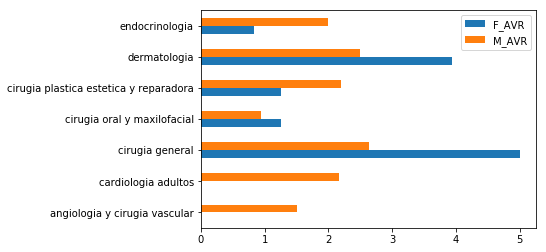

In [15]:
ax = exp_medList_split[0].plot.barh(rot=0)

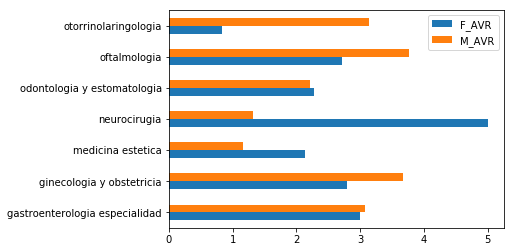

In [16]:
ax = exp_medList_split[1].plot.barh(rot=0)

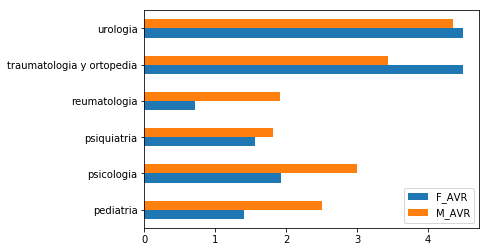

In [17]:
ax = exp_medList_split[2].plot.barh(rot=0)

In [19]:
def get_bias(i): 
    log2 = math.log2(i+1)
    return  1/log2

In [20]:
famel_num_l=[]
male_num_l=[]
male_bia_l=[]
famel_bia_l=[]
diff_avg_exposure_l=[]
for q in sorted(f_queries_co):  
    diff_avg_exposure=0.0    
    count=0
    med_famel=0.0
    med_male=0.0
    count_famel=0
    count_male=0
    famel_bais=0
    male_bais=0
    quary=q 
    df_20 = df_u2_sex_filtered[(df_u2_sex_filtered['speciality'] == q) & (df_u2_sex_filtered['source'] == 'top doctors')].sort_values('#')[:20]
    for index, row in df_20.iterrows():
        
        if (row['gender'] == 'female'):
            count=count+1
            famel_bais=famel_bais+get_bias(count)
            count_famel=count_famel+1
            #print ('count',count)
            #print ('famel_bais',famel_bais)
            
        elif (row['gender'] == 'male'):
            count=count+1
            male_bais=male_bais+get_bias(count)
            count_male=count_male+1

            #print ('count',count)
            #print ('male_bais',male_bais)
            
        else:
            continue
    print(q)
    if(count_famel!=0):
        med_famel=round(famel_bais/count_famel,2)
    if(count_male!=0):
        med_male=round(male_bais/count_male,2)
    diff_avg_exposure=round(abs(med_famel-med_male),2)

    print('famel_bais',med_famel)
    print('male_bais',med_male)  
    print('diff_avg_exposure',diff_avg_exposure)    

    male_bia_l.append(med_male)
    famel_bia_l.append(med_famel)
    diff_avg_exposure_l.append(diff_avg_exposure)

angiologia y cirugia vascular
famel_bais 0.0
male_bais 0.35
diff_avg_exposure 0.35
cardiologia adultos
famel_bais 0.62
male_bais 0.32
diff_avg_exposure 0.3
cirugia general
famel_bais 0.5
male_bais 0.34
diff_avg_exposure 0.16
cirugia oral y maxilofacial
famel_bais 0.3
male_bais 0.37
diff_avg_exposure 0.07
cirugia plastica estetica y reparadora
famel_bais 0.37
male_bais 0.35
diff_avg_exposure 0.02
dermatologia
famel_bais 0.36
male_bais 0.32
diff_avg_exposure 0.04
endocrinologia
famel_bais 0.44
male_bais 0.31
diff_avg_exposure 0.13
gastroenterologia especialidad
famel_bais 0.28
male_bais 0.38
diff_avg_exposure 0.1
ginecologia y obstetricia
famel_bais 0.29
male_bais 0.37
diff_avg_exposure 0.08
medicina estetica
famel_bais 0.29
male_bais 0.5
diff_avg_exposure 0.21
neurocirugia
famel_bais 0.32
male_bais 0.35
diff_avg_exposure 0.03
odontologia y estomatologia
famel_bais 0.31
male_bais 0.4
diff_avg_exposure 0.09
oftalmologia
famel_bais 0.35
male_bais 0.35
diff_avg_exposure 0.0
otorrinolaringol

In [22]:
expA_medList = pd.DataFrame(
    {'M_AVE': male_bia_l,
     'F_AVE': famel_bia_l}, index=f_queries_co)

In [28]:
export_csv = expA_medList.to_csv (r' difference_in_avg_exposure_doctor_colombia.csv', header=True) #Don't forget to add '.csv' at the end of the path


In [23]:
expA_medList_split = np.array_split(expA_medList, 3)


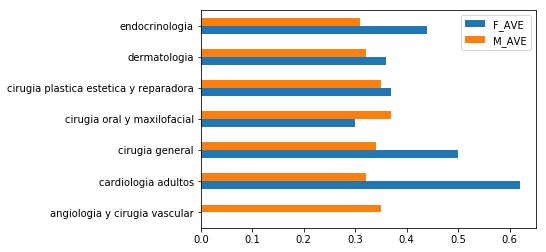

In [24]:
ax = expA_medList_split[0].plot.barh(rot=0)

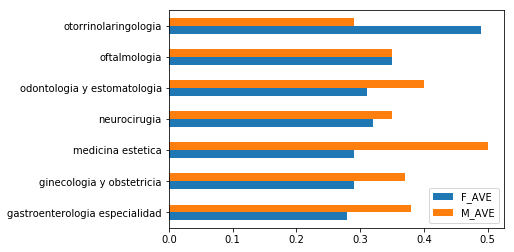

In [26]:
ax = expA_medList_split[1].plot.barh(rot=0)

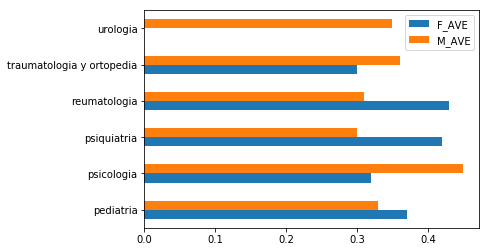

In [27]:
ax = expA_medList_split[2].plot.barh(rot=0)

In [29]:
rsult=pd.concat([expA_medList, exp_medList], axis=1)


In [30]:
Diff_between_exp_rel = pd.DataFrame(
    {'diff_avg_relevance':diff_avg_relevance_l,
    'diff_avg_exposure':diff_avg_exposure_l}, index=f_queries_co)

In [31]:
export_csv = Diff_between_exp_rel.to_csv (r' Diff_between_exp_rel_doctor_colombia.csv', header=True) #Don't forget to add '.csv' at the end of the path


In [32]:
export_csv = rsult.to_csv (r' result_exp_rel_doctor_colombia.csv', header=True) #Don't forget to add '.csv' at the end of the path
